### Testing

In [1]:
import pysimdeum

In [2]:
house = pysimdeum.built_house(house_type='family')

/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[start:end] = intensity
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6723566666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  discharge_pattern.loc[discharge_start:discharge_end - pd.Timedelta(seconds=1)] = discharge_rate # restrict range to not be inclusive of final timstamp as this would result in extra discharge
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:338: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

In [3]:
house.appliances

[WcNewSave(name='WcNewSave'),
 BathroomTap(name='BathroomTap'),
 KitchenTap(name='KitchenTap'),
 OutsideTap(name='OutsideTap'),
 NormalShower(name='NormalShower'),
 WashingMachine(name='EndUse')]

In [4]:
consumption, discharge = house.simulate(duration='1 day', num_patterns=1, simulate_discharge=True, spillover=True)

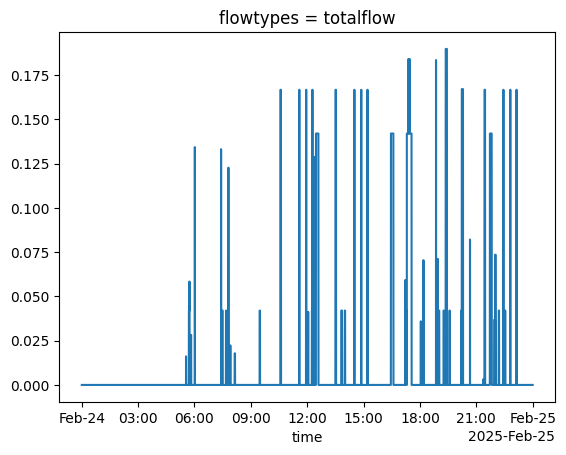

In [5]:
consumption.sum(['enduse', 'user']).sel(flowtypes='totalflow').mean(['patterns']).plot()

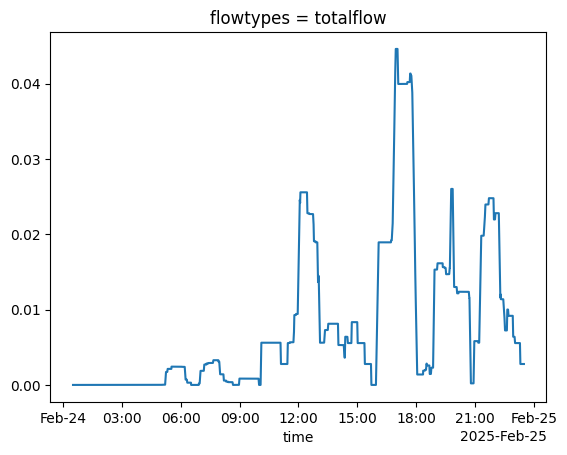

In [6]:
consumption.sum(['enduse', 'user']).sel(flowtypes='totalflow').mean(['patterns']).rolling(time=3600, center=True).mean().plot()

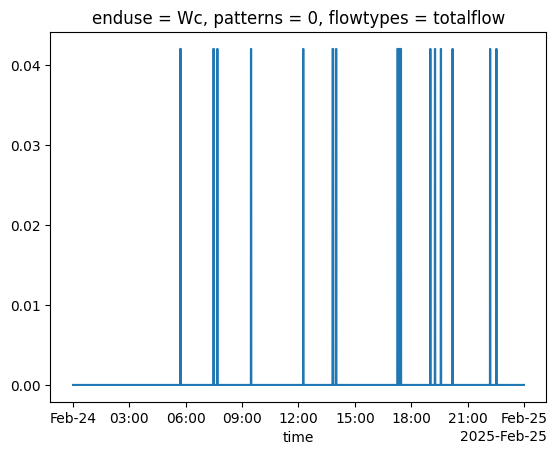

In [7]:
consumption.sum(["user"]).sel(enduse="Wc").sel(flowtypes="totalflow").plot()

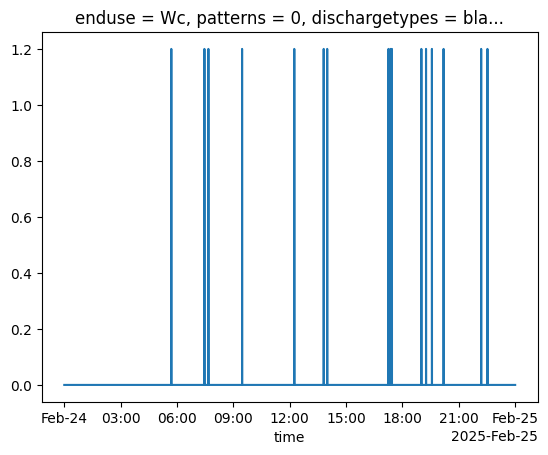

In [8]:
discharge.sum(["user"]).sel(enduse="Wc").sel(dischargetypes="blackwater").plot()

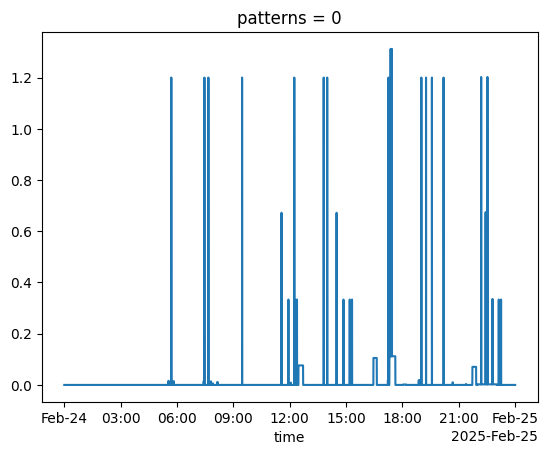

In [9]:
discharge.sum(["enduse","user","dischargetypes"]).plot()

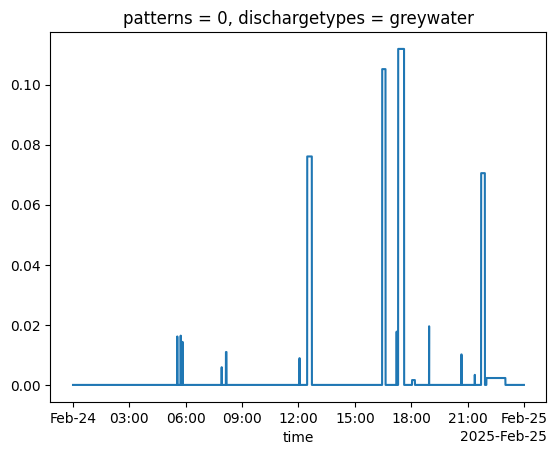

In [10]:
discharge.sum(["enduse","user"]).sel(dischargetypes="greywater").plot()

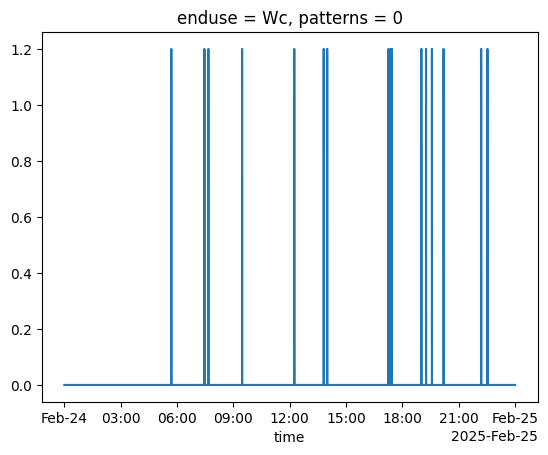

In [11]:
discharge.sum(["user","dischargetypes"]).sel(enduse="Wc").plot()

In [12]:
discharge

<xarray.DataArray (time: 86401, user: 5, enduse: 6, patterns: 1,
                   dischargetypes: 2)> Size: 41MB
array([[[[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],
...
         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]]]])
Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-02-24 ... 2025-02-25
  * user            (user) <U9 180B 'user_1' 'user_2' ... 'user_4' 'household'
  * enduse          (enduse) <U14 336B 'Wc' 'BathroomTap' ... 'WashingMachine'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

### Troubleshooting

In [16]:
# dims - names of axes
discharge.dims

('time', 'user', 'enduse', 'patterns', 'dischargetypes')

In [17]:
# coords - named dimensions and corresponding values
discharge.coords

Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-02-24 ... 2025-02-25
  * user            (user) <U9 180B 'user_1' 'user_2' ... 'user_4' 'household'
  * enduse          (enduse) <U14 336B 'Wc' 'BathroomTap' ... 'WashingMachine'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

In [18]:
discharge.dischargetypes

<xarray.DataArray 'dischargetypes' (dischargetypes: 2)> Size: 80B
array(['greywater', 'blackwater'], dtype='<U10')
Coordinates:
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

In [19]:
discharge.coords['dischargetypes']

<xarray.DataArray 'dischargetypes' (dischargetypes: 2)> Size: 80B
array(['greywater', 'blackwater'], dtype='<U10')
Coordinates:
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

In [20]:
discharge.attrs

{}

### Trying

In [ ]:
import xarray as xr
import numpy as np

nutrient_concentration = ['N', 'P', 'COD', 'BOD5', 'SS', 'Amm']
dischargetypes = ['greywater', 'blackwater']

d_exp = discharge.expand_dims(nutrient_concentration=nutrient_concentration, axis=-1)

# Create a new DataArray with the expanded dimensions and additional dischargetypes
shape = d_exp.shape[:-1] + (len(dischargetypes) + 1,)
coords = {**d_exp.coords, 'dischargetypes': dischargetypes + ['nut_conc']}
dims = d_exp.dims

d_exp

#new_discharge = xr.DataArray(
#    data=np.zeros(shape),
#    coords=coords,
#    dims=dims
#)

# Copy the existing data into the new DataArray
#for dtype in dischargetypes:
#    new_discharge.loc[dict(dischargetypes=dtype)] = d_exp.sel(dischargetypes=dtype)

d_exp

<xarray.DataArray (time: 86401, user: 5, enduse: 7, patterns: 1,
                   dischargetypes: 2, nutrient_concentration: 6)> Size: 290MB
array([[[[[[0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ]]],


         [[[0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ]]],


         [[[0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ]]],


         ...,

...

         ...,


         [[[0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ]]],


         [[[0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ]]],


         [[[0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , 0.        ,
            0.        , 0.        ]]]]]])
Coordinates:
  * nutrient_concentration  (nutrient_concentration) object 48B 'N' ... 'Amm'
  * time                    (time) datetime64[ns] 691kB 2025-02-24 ... 2025-0...
  * user                    (user) <U9 180B 'user_1' 'user_2' ... 'household'
  * enduse                  (enduse) <U14 392B 'Wc' ... 'WashingMachine'
  * patterns                (patterns) int64 8B 0
  * dischargetypes          (dischargetypes) <U10 80B 'greywater' 'blackwater'

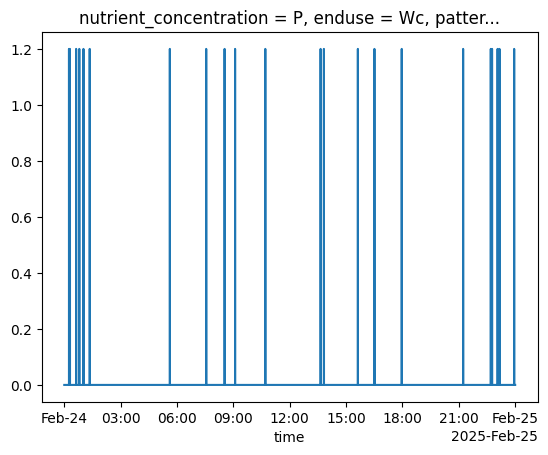

In [ ]:
d_exp.sum(["user"]).sel(enduse="Wc").sel(dischargetypes="blackwater").sel(nutrient_concentration="P").plot()

In [ ]:
# New dimension and coordinates
nutrient_concentration = ['N', 'P', 'COD', 'BOD5', 'SS', 'Amm']

# Expand the discharge DataArray to include the nutrient_concentration dimension
discharge_expanded = discharge.expand_dims(nutrient_concentration=nutrient_concentration, axis=-1)

# Initialize the new dimension with zeros
discharge_expanded.loc[dict(nutrient_concentration=nutrient_concentration)] = 0

# Create a new DataArray with the expanded dimensions and additional dischargetypes
shape = discharge_expanded.shape[:-1] + (len(dischargetypes) + 1,)
coords = {**discharge_expanded.coords, 'dischargetypes': dischargetypes + ['nutrient_conc']}
dims = discharge_expanded.dims

print(coords)

new_discharge = xr.DataArray(
    data=np.zeros(shape),
    coords=coords,
    dims=dims
)

# Copy the existing data into the new DataArray
for dtype in dischargetypes:
    new_discharge.loc[dict(dischargetypes=dtype)] = discharge_expanded.sel(dischargetypes=dtype)

# Set the value of 0.1 for all positions that have non-zero values of blackwater dischargetype
blackwater_non_zero = new_discharge.sel(dischargetypes='blackwater') > 0
new_discharge.loc[dict(dischargetypes='nutrient_conc')][blackwater_non_zero] = 0.1

# Print the updated discharge DataArray
print(new_discharge)

ValueError: Assignment destination is a view.  Do you want to .copy() array first?

In [ ]:
import polars as pl
df = discharge.to_dataframe(name='flow').reset_index()

pl_df = pl.DataFrame(df)

# Define the nutrients and their corresponding multipliers
nutrient_multipliers = {
    'N': 0.1,
    'P': 0.3,
    'COD': 0.5,
    'BOD5': 0.2,
    'SS': 0.4,
    'Amm': 0.6
}

# Add new columns for each nutrient initialized to zero
for nutrient in nutrient_multipliers.keys():
    pl_df = pl_df.with_columns(pl.lit(0).alias(nutrient))

# Add new columns for each nutrient and set their values based on the multipliers
for nutrient, multiplier in nutrient_multipliers.items():
    pl_df = pl_df.with_columns(
        pl.when((pl_df['flow'] > 0))
        .then((pl_df['flow']) * multiplier)
        .otherwise(pl_df[nutrient])
        .alias(nutrient)
    )

pl_df

time,user,enduse,patterns,dischargetypes,flow,N,P,COD,BOD5,SS,Amm
datetime[ns],str,str,i64,str,f64,f64,f64,f64,f64,f64,f64
2025-02-24 00:00:00,"""user_1""","""Wc""",0,"""greywater""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-02-24 00:00:00,"""user_1""","""Wc""",0,"""blackwater""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-02-24 00:00:00,"""user_1""","""Bathtub""",0,"""greywater""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-02-24 00:00:00,"""user_1""","""Bathtub""",0,"""blackwater""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-02-24 00:00:00,"""user_1""","""BathroomTap""",0,"""greywater""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…
2025-02-25 00:00:00,"""household""","""OutsideTap""",0,"""blackwater""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-02-25 00:00:00,"""household""","""Shower""",0,"""greywater""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-02-25 00:00:00,"""household""","""Shower""",0,"""blackwater""",0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pl_df.filter((pl_df['dischargetypes'] == 'blackwater') & (pl_df['flow'] > 0))

time,user,enduse,patterns,dischargetypes,flow,N,P,COD,BOD5,SS,Amm
datetime[ns],str,str,i64,str,f64,f64,f64,f64,f64,f64,f64
2025-02-24 00:15:01,"""user_4""","""Wc""",0,"""blackwater""",1.2,0.12,0.36,0.6,0.24,0.48,0.72
2025-02-24 00:15:02,"""user_4""","""Wc""",0,"""blackwater""",1.2,0.12,0.36,0.6,0.24,0.48,0.72
2025-02-24 00:15:03,"""user_4""","""Wc""",0,"""blackwater""",1.2,0.12,0.36,0.6,0.24,0.48,0.72
2025-02-24 00:15:04,"""user_4""","""Wc""",0,"""blackwater""",1.2,0.12,0.36,0.6,0.24,0.48,0.72
2025-02-24 00:18:02,"""user_4""","""Wc""",0,"""blackwater""",1.2,0.12,0.36,0.6,0.24,0.48,0.72
…,…,…,…,…,…,…,…,…,…,…,…
2025-02-24 23:56:42,"""user_1""","""Wc""",0,"""blackwater""",1.2,0.12,0.36,0.6,0.24,0.48,0.72
2025-02-24 23:56:43,"""user_1""","""Wc""",0,"""blackwater""",1.2,0.12,0.36,0.6,0.24,0.48,0.72
2025-02-24 23:56:44,"""user_1""","""Wc""",0,"""blackwater""",1.2,0.12,0.36,0.6,0.24,0.48,0.72


In [ ]:
pl_df.sum(["user"]).sel(enduse="Wc").plot()

TypeError: DataFrame.sum() takes 1 positional argument but 2 were given

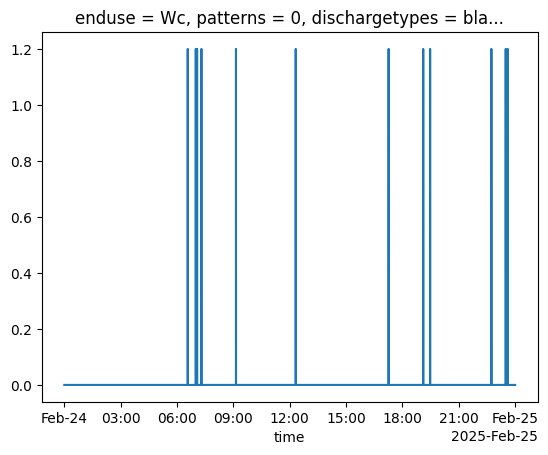

In [ ]:
discharge.sum(["user"]).sel(enduse="Wc").sel(dischargetypes="blackwater").plot()

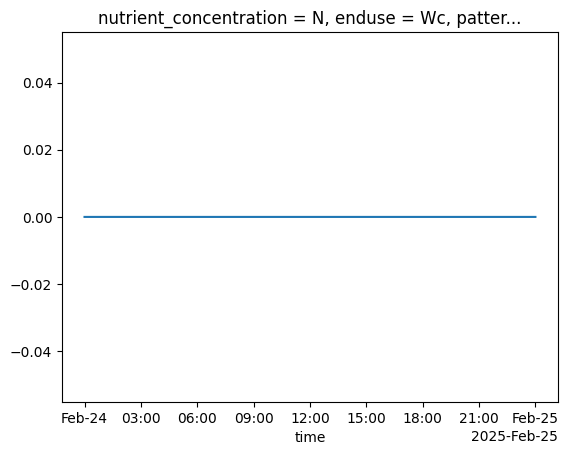

In [ ]:
d_exp.sum(["user"]).sel(enduse="Wc").sel(dischargetypes="greywater").sel(nutrient_concentration="N").plot()

### Dataset format

In [33]:
import xarray as xr
import toml

toml_file_path = '/Users/val.ismaili/DAA/pysimdeum/pysimdeum/data/NL/ww_nutrients.toml'
nutrient_data = toml.load(toml_file_path)

# Convert the DataArray to a pandas DataFrame
df = discharge.to_dataframe(name='flow').reset_index()

# Define the nutrients
nutrients = ['n', 'p', 'cod', 'bod5', 'ss', 'amm']

# Add new columns for each nutrient initialized to zero
for nutrient in nutrients:
    df[nutrient] = 0

# Set the values for each nutrient based on the multipliers from the TOML file
for nutrient in nutrients:
    for enduse in nutrient_data.keys():
        multiplier = nutrient_data[enduse][nutrient]
        df.loc[df['enduse'] == enduse, nutrient] = df['flow'] * multiplier

# Create an xarray.Dataset and add the discharge DataArray to it
ds = xr.Dataset({'discharge': discharge})

# Add the pandas DataFrame to the xarray.Dataset as a new variable
ds['df'] = (('index', 'columns'), df.values)
ds['df_index'] = ('index', df.index)
ds['df_columns'] = ('columns', df.columns)

ds

/var/folders/y5/x93059_x67b9v8zzbq9x285nrqn4c0/T/ipykernel_44124/3587903937.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['enduse'] == enduse, nutrient] = df['flow'] * multiplier
/var/folders/y5/x93059_x67b9v8zzbq9x285nrqn4c0/T/ipykernel_44124/3587903937.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['enduse'] == enduse, nutrient] = df['flow'] * multiplier
/var/folders/y5/x93059_x67b9v8zzbq9x285nrqn4c0/T/ipykernel_44124/3587903937.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0

<xarray.Dataset> Size: 581MB
Dimensions:         (time: 86401, user: 5, enduse: 6, patterns: 1,
                     dischargetypes: 2, index: 5184060, columns: 12)
Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-02-24 ... 2025-02-25
  * user            (user) <U9 180B 'user_1' 'user_2' ... 'user_4' 'household'
  * enduse          (enduse) <U14 336B 'Wc' 'BathroomTap' ... 'WashingMachine'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'
Dimensions without coordinates: index, columns
Data variables:
    discharge       (time, user, enduse, patterns, dischargetypes) float64 41MB ...
    df              (index, columns) object 498MB 2025-02-24 'user_1' ... 0.0
    df_index        (index) int64 41MB 0 1 2 3 ... 5184057 5184058 5184059
    df_columns      (columns) object 96B 'time' 'user' 'enduse' ... 'ss' 'amm'

In [34]:
import pandas as pd
df_from_ds = pd.DataFrame(data=ds['df'].values, index=ds['df_index'].values, columns=ds['df_columns'].values)
df_from_ds[df_from_ds['flow'] != 0]

,time,user,enduse,patterns,dischargetypes,flow,n,p,cod,bod5,ss,amm
1198502,2025-02-24 05:32:55,user_1,BathroomTap,0,greywater,0.016137,0.001614,0.003227,0.004841,0.006455,0.008069,0.009682
1198562,2025-02-24 05:32:56,user_1,BathroomTap,0,greywater,0.016137,0.001614,0.003227,0.004841,0.006455,0.008069,0.009682
1198622,2025-02-24 05:32:57,user_1,BathroomTap,0,greywater,0.016137,0.001614,0.003227,0.004841,0.006455,0.008069,0.009682
1198682,2025-02-24 05:32:58,user_1,BathroomTap,0,greywater,0.016137,0.001614,0.003227,0.004841,0.006455,0.008069,0.009682
1198742,2025-02-24 05:32:59,user_1,BathroomTap,0,greywater,0.016137,0.001614,0.003227,0.004841,0.006455,0.008069,0.009682
...,...,...,...,...,...,...,...,...,...,...,...,...
5021759,2025-02-24 23:14:55,household,WashingMachine,0,blackwater,0.3334,0.03334,0.06668,0.10002,0.13336,0.1667,0.20004
5021819,2025-02-24 23:14:56,household,WashingMachine,0,blackwater,0.3334,0.03334,0.06668,0.10002,0.13336,0.1667,0.20004
5021879,2025-02-24 23:14:57,household,WashingMachine,0,blackwater,0.3334,0.03334,0.06668,0.10002,0.13336,0.1667,0.20004
5021939,2025-02-24 23:14:58,household,WashingMachine,0,blackwater,0.3334,0.03334,0.06668,0.10002,0.13336,0.1667,0.20004


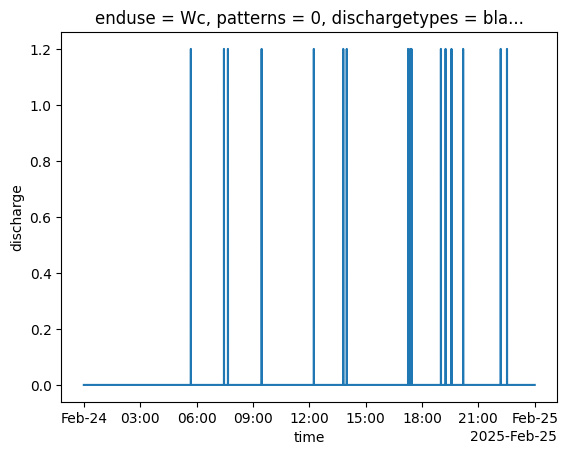

In [35]:
ds.discharge.sum(["user"]).sel(enduse="Wc").sel(dischargetypes="blackwater").plot()